### Pregunta de Negoci - Analistes del Perfil del Client:

> Quins s√≥n els perfils demogr√†fics que mostren m√©s propensi√≥ a
contractar productes financers?

### Llibreries i c√†rrega de dades

In [1]:
"""Libreries que poden ser necess√†ries"""

# Manejo de datos
import pandas as pd                 # An√°lisis y manipulaci√≥n de datos en tablas
import numpy as np                  # C√°lculos num√©ricos y matrices
import os                           # Gesti√≥n de rutas de archivos

# Visualizaci√≥n de datos
import matplotlib.pyplot as plt     # Gr√°ficos b√°sicos en 2D
import seaborn as sns               # Gr√°ficos estad√≠sticos mejorados
import plotly.express as px         # Gr√°ficos interactivos simplificados
import plotly.graph_objects as go   # Control avanzado de gr√°ficos en Plotly
import plotly.io as pio             # Interfaz de entrada/salida de Plotly
import squarify                     # Visualizaci√≥n de diagramas de "treemap"
from plottable import Table         # Visualizaci√≥n de tablas
import matplotlib.colors as mcolors #¬†Colores y mapas de colores


In [2]:
#¬†pip install plottable

In [3]:
df = pd.read_csv("../Data/df_250519.csv")

Paleta de colors

In [4]:
custom_palette = ["#AABBC8", "#2CCED1", "#5F6F81", "#DCE3EA", "#2E2F36"]  
sns.set_palette(sns.color_palette(custom_palette))

### Extracte KPIs

In [5]:

#¬†Variables 
contactados   = df.nunique().id                                     # N√∫mero total de clientes contactados
suscribieron  = df[df['deposit'] == True].nunique().id             # N√∫mero de clientes que suscribieron 
duracion_llam = df[df['deposit'] == True].duration.sum()           # Duraci√≥n de llamadas a suscriptores
llam_telf = df[df['contact'] == 'telephone']['campaign'].sum()      # N√∫mero de llamadas realizadas por tel√©fono
llam_cell = df[df['contact'] == 'cellular']['campaign'].sum()       # N√∫mero de llamadas realizadas por movil
llam = df['campaign'].sum()                                         #¬†N√∫mero total de llamadas
contatos_previos_sus = df[df['deposit'] == True]['previous'].sum() # N√∫mero de contactos previos a suscriptores
suscribieron_por_mes = df[df['deposit'] == True].groupby('month').count()['deposit']  # Suscriptores en el mes
contactos_por_mes = df.groupby('month').count()['deposit']          # clientes contactados en el mes      
conversion_por_mes = suscribieron_por_mes / contactos_por_mes       #¬†conversi√≥n por mes


# Prints
print("El n√∫mero total de clientes contactados es:",contactados)
print("El n√∫mero de suscriptores es:",suscribieron)
print("La duraci√≥n total de las llamadas a suscriptores es:",duracion_llam)
print("El n√∫mero de llamadas realizadas a tel√©fono fijo es: ", llam_telf)
print("El n√∫mero de llamadas realizadas a m√≥vil es: ", llam_cell)
print("El n√∫mero total de llamadas realizadas es: ", llam)
print("El n√∫mero total de contactos previos de los suscriptores es:", contatos_previos_sus)
print("La conversi√≥n por mes es: ", conversion_por_mes)

El n√∫mero total de clientes contactados es: 16163
El n√∫mero de suscriptores es: 7712
La duraci√≥n total de las llamadas a suscriptores es: 4161406
El n√∫mero de llamadas realizadas a tel√©fono fijo es:  3274
El n√∫mero de llamadas realizadas a m√≥vil es:  28002
El n√∫mero total de llamadas realizadas es:  40513
El n√∫mero total de contactos previos de los suscriptores es: 9149
La conversi√≥n por mes es:  month
Apr    0.632210
Aug    0.456830
Dec    0.910256
Feb    0.579892
Jan    0.408537
Jul    0.413684
Jun    0.447770
Mar    0.903704
May    0.334953
Nov    0.420236
Oct    0.837500
Sep    0.842333
Name: deposit, dtype: float64


In [6]:
#KPIs
kpi1 = suscribieron/contactados          # porcentaje de conversi√≥n a dep√≥sito
kpi2 = duracion_llam/suscribieron        # promedio de duraci√≥n de llamadas a suscriptores
kpi3_tel = llam_telf/llam                # porcentaje de llamadas a tel√©fono
kpi3_cell = llam_cell/llam               # porcentaje de llamadas a m√≥vil
kpi3 = (llam_telf+llam_cell)/llam        # porcentaje de llamadas a tel√©fono o m√≥vil
kpi4 = contatos_previos_sus/suscribieron # promedio de contactos previos a suscriptores
kpi5 = conversion_por_mes.idxmax()       # mes con mayor tasa de conversi√≥n
kpi5_tasa = conversion_por_mes.max()     #¬†tasa de conversi√≥n del mes con mayor tasa de conversi√≥n




#¬†Prints
print("KPI 1: El porcentaje de conversi√≥n a dep√≥sito es ",kpi1*100,"%")
print("KPI 2: La duraci√≥n media de las llamadas a suscriptoreses",kpi2)
print("KPI 3: El porcentaje de llamadas realizadas por tel√©fono o m√≥vil es ",kpi3*100,"%")
print("KPI 4: El porcentaje de contactos previos a suscriptores es ",kpi4)
print("KPI 5: El mes amb millor conversi√≥ ha sigut", kpi5, "amb una taxa de conversi√≥ de", kpi5_tasa)

KPI 1: El porcentaje de conversi√≥n a dep√≥sito es  47.713914496071276 %
KPI 2: La duraci√≥n media de las llamadas a suscriptoreses 539.6014004149378
KPI 3: El porcentaje de llamadas realizadas por tel√©fono o m√≥vil es  77.1999111396342 %
KPI 4: El porcentaje de contactos previos a suscriptores es  1.1863329875518671
KPI 5: El mes amb millor conversi√≥ ha sigut Dec amb una taxa de conversi√≥ de 0.9102564102564102


# An√†lisi Roser

Aquesta taula ve de l'informe anterior, nom√©s li hem hem canviat la taxa a percentatge

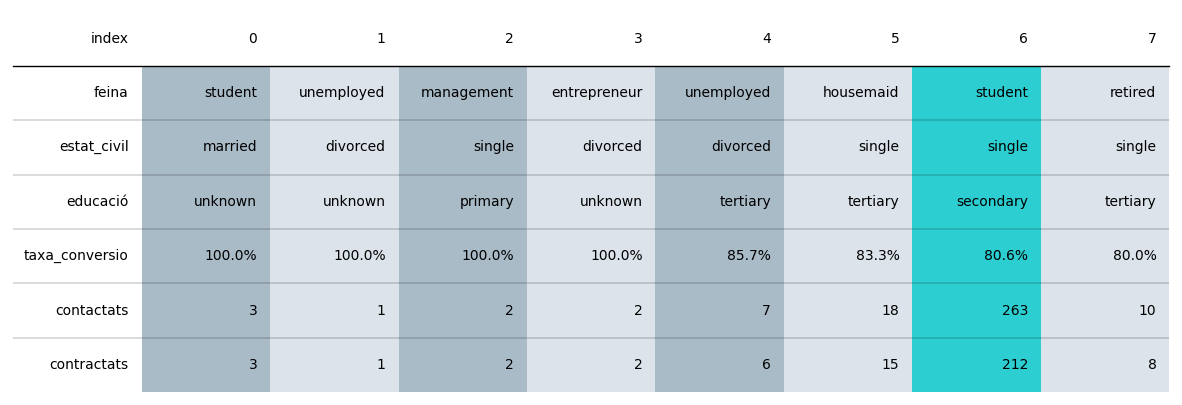

In [7]:
# Agrupem el dataframe per la combinaci√≥ de les caracter√≠stiques demogr√†fiques 
df_agrupat_pc = df.groupby(['job', 'marital', 'education'])


# Creem una taula per al c√†lcul de conversions
taula_conversio_pc = []

# Recorrem la taula calculant la conversi√≥ de cada grup
for (feina, estat_civil, educacio), grup in df_agrupat_pc:
    contactats = grup.nunique().id
    contractats = grup[grup['deposit'] == True].nunique().id
    conversio = contractats / contactats if contactats != 0 else 0

    # Afegim cada resultat a la taula
    taula_conversio_pc.append({
        'feina': feina,
        'estat_civil': estat_civil,
        'educaci√≥': educacio,
        'contactats': contactats,
        'contractats': contractats,
        'taxa_conversio': conversio
    })

# Convertim la taula de conversi√≥ en un dataframe 
df_conversio_pc = pd.DataFrame(taula_conversio_pc)

# Ordenem el dataframe per la taxa de conversi√≥ de major a menor
resultats_ordenats = df_conversio_pc.sort_values(by='taxa_conversio', ascending=False)

#¬†Arrodonim la taxa de conversi√≥ a 3 decimals
resultats_ordenats['taxa_conversio'] = resultats_ordenats['taxa_conversio'].round(3)

# Reiniciem l'index
resultats_ordenats = resultats_ordenats.reset_index()
resultats_ordenats = resultats_ordenats.drop(columns=['index'])


# Fer c√≤pia del top 8 i seleccionar columnes
top8_resultats_ordenats = resultats_ordenats.head(8).copy()

# Convertir taxa de conversi√≥ a percentatge (amb 1 decimal)
top8_resultats_ordenats['taxa_conversio'] = (top8_resultats_ordenats['taxa_conversio'] * 100).round(1).astype(str) + '%'

top8_resultats_ordenats = top8_resultats_ordenats[[
    'feina', 'estat_civil', 'educaci√≥', 'taxa_conversio', 'contactats', 'contractats'
]]


# Reordenar columnes si cal
top8_resultats_ordenats = top8_resultats_ordenats[[
    'feina', 'estat_civil', 'educaci√≥', 'taxa_conversio', 'contactats', 'contractats'
]]


# Transposar per visualitzaci√≥
top8_resultats_ordenats = top8_resultats_ordenats.transpose()

# Mostrar taula 
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    top8_resultats_ordenats,
)

#¬†Modifiquem manualment els colors de les columnes
tab.columns[0].set_facecolor('#AABBC8')
tab.columns[1].set_facecolor('#DCE3EA')
tab.columns[2].set_facecolor('#AABBC8')
tab.columns[3].set_facecolor('#DCE3EA')
tab.columns[4].set_facecolor('#AABBC8')
tab.columns[5].set_facecolor('#DCE3EA')
tab.columns[6].set_facecolor('#2CCED1')
tab.columns[7].set_facecolor('#DCE3EA')


plt.show()


Ara li volem afegir a cada perfil, la probabilitat de tenir una hipoteca o un altre tipus de pr√®stec

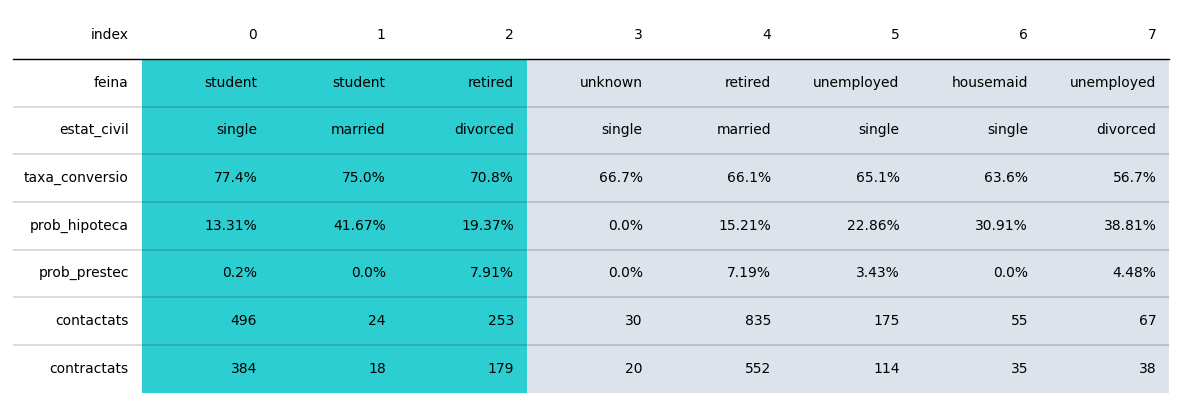

In [8]:
# Agrupem el dataframe per la combinaci√≥ de les caracter√≠stiques demogr√†fiques 
df_agrupat_pc = df.groupby(['job', 'marital'])


# Creem una taula per al c√†lcul de conversions
taula_conversio_pc = []

# Recorrem la taula calculant la conversi√≥ i altres m√®triques de cada grup
for (feina, estat_civil), grup in df_agrupat_pc:
    contactats = grup.nunique().id
    contractats = grup[grup['deposit'] == True].nunique().id
    conversio = contractats / contactats if contactats != 0 else 0
    prob_hipoteca = grup['housing'].mean()  # True=1, False=0 ‚Üí mitjana = proporci√≥
    prob_prestec = grup['loan'].mean()

    # Afegim cada resultat a la taula
    taula_conversio_pc.append({
        'feina': feina,
        'estat_civil': estat_civil,
        'contactats': contactats,
        'contractats': contractats,
        'taxa_conversio': conversio,
        'prob_hipoteca': prob_hipoteca,
        'prob_prestec': prob_prestec
    })

# Convertim la taula de conversi√≥ en un dataframe 
df_conversio_pc = pd.DataFrame(taula_conversio_pc)

# Ordenem el dataframe per la taxa de conversi√≥ de major a menor
resultats_ordenats = df_conversio_pc.sort_values(by='taxa_conversio', ascending=False)

#¬†Arrodonim la taxa de conversi√≥ a 3 decimals
resultats_ordenats['taxa_conversio'] = resultats_ordenats['taxa_conversio'].round(3)

# Reiniciem l'index
resultats_ordenats = resultats_ordenats.reset_index()
resultats_ordenats = resultats_ordenats.drop(columns=['index'])


# Fer c√≤pia del top 8 i seleccionar columnes
top8_resultats_ordenats = resultats_ordenats.head(8).copy()

# Convertir les proporcions i la conversi√≥ a percentatge amb 1 decimal
top8_resultats_ordenats['taxa_conversio'] = (top8_resultats_ordenats['taxa_conversio'] * 100).round(2).astype(str) + '%'
top8_resultats_ordenats['prob_hipoteca'] = (top8_resultats_ordenats['prob_hipoteca'] * 100).round(2).astype(str) + '%'
top8_resultats_ordenats['prob_prestec'] = (top8_resultats_ordenats['prob_prestec'] * 100).round(2).astype(str) + '%'


# Reordenar columnes si cal
top8_resultats_ordenats = top8_resultats_ordenats[[
    'feina', 'estat_civil', 'taxa_conversio','prob_hipoteca', 'prob_prestec', 'contactats', 'contractats'
]]



# Transposar per visualitzaci√≥
top8_resultats_ordenats = top8_resultats_ordenats.transpose()

# Mostrar taula 
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    top8_resultats_ordenats,
)

#¬†Modifiquem manualment els colors de les columnes
tab.columns[0].set_facecolor('#2CCED1')
tab.columns[1].set_facecolor('#2CCED1')
tab.columns[2].set_facecolor('#2CCED1')
tab.columns[3].set_facecolor('#DCE3EA')
tab.columns[4].set_facecolor('#DCE3EA')
tab.columns[5].set_facecolor('#DCE3EA')
tab.columns[6].set_facecolor('#DCE3EA')
tab.columns[7].set_facecolor('#DCE3EA')


plt.show()


O ara el default i la mitjana de balan√ß

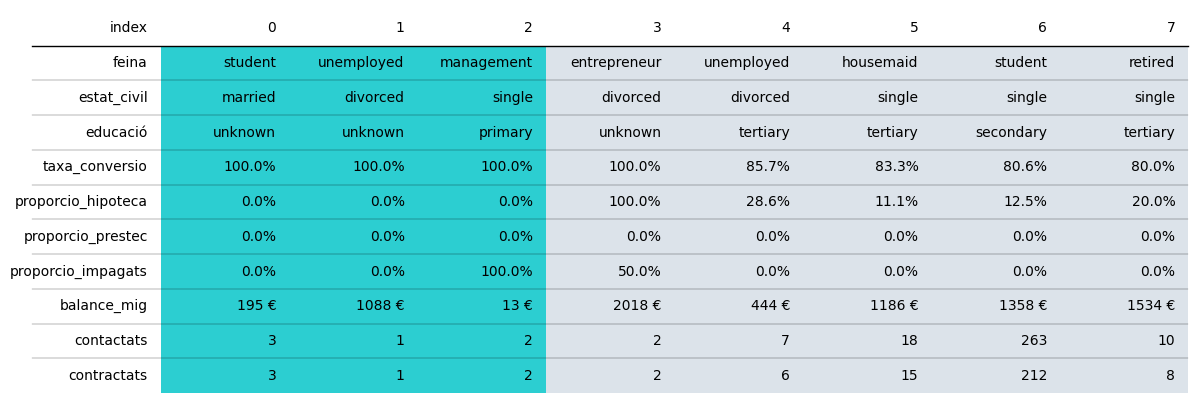

In [9]:


# Agrupem el dataframe per la combinaci√≥ de les caracter√≠stiques demogr√†fiques 
df_agrupat_pc = df.groupby(['job', 'marital', 'education'])

# Creem una taula per al c√†lcul de conversions
taula_conversio_pc = []

# Recorrem la taula calculant la conversi√≥ i altres m√®triques de cada grup
for (feina, estat_civil, educacio), grup in df_agrupat_pc:
    contactats = grup.nunique().id
    contractats = grup[grup['deposit'] == True].nunique().id
    conversio = contractats / contactats if contactats != 0 else 0
    proporcio_hipoteca = grup['housing'].mean()
    proporcio_prestec = grup['loan'].mean()
    proporcio_impagats = grup['default'].mean()
    balance_mig = grup['balance'].mean()

    # Afegim cada resultat a la taula
    taula_conversio_pc.append({
        'feina': feina,
        'estat_civil': estat_civil,
        'educaci√≥': educacio,
        'contactats': contactats,
        'contractats': contractats,
        'taxa_conversio': conversio,
        'proporcio_hipoteca': proporcio_hipoteca,
        'proporcio_prestec': proporcio_prestec,
        'proporcio_impagats': proporcio_impagats,
        'balance_mig': balance_mig
    })

# Convertim la taula de conversi√≥ en un dataframe 
resultats_ordenats3 = pd.DataFrame(taula_conversio_pc)

# Ordenem per la taxa de conversi√≥
resultats_ordenats3 = resultats_ordenats3.sort_values(by='taxa_conversio', ascending=False).reset_index(drop=True)

# Convertir proporcions a percentatges i balance a euros arrodonit
resultats_ordenats3['taxa_conversio'] = (resultats_ordenats3['taxa_conversio'] * 100).round(1).astype(str) + '%'
resultats_ordenats3['proporcio_hipoteca'] = (resultats_ordenats3['proporcio_hipoteca'] * 100).round(1).astype(str) + '%'
resultats_ordenats3['proporcio_prestec'] = (resultats_ordenats3['proporcio_prestec'] * 100).round(1).astype(str) + '%'
resultats_ordenats3['proporcio_impagats'] = (resultats_ordenats3['proporcio_impagats'] * 100).round(1).astype(str) + '%'
resultats_ordenats3['balance_mig'] = resultats_ordenats3['balance_mig'].round(0).astype(int).astype(str) + ' ‚Ç¨'

# Seleccionar el top 8
top8_resultats_ordenats3 = resultats_ordenats3.head(8).copy()

# Seleccionar columnes per mostrar
top8_resultats_ordenats3 = top8_resultats_ordenats3[[
    'feina', 'estat_civil', 'educaci√≥',
    'taxa_conversio',
    'proporcio_hipoteca', 'proporcio_prestec',
    'proporcio_impagats', 'balance_mig','contactats', 'contractats'
]]

# Transposar per visualitzaci√≥
top8_transposada3 = top8_resultats_ordenats3.transpose()



# Mostrar taula
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    top8_transposada3,
)


#¬†Modifiquem manualment els colors de les columnes
tab.columns[0].set_facecolor('#2CCED1')
tab.columns[1].set_facecolor('#2CCED1')
tab.columns[2].set_facecolor('#2CCED1')
tab.columns[3].set_facecolor('#DCE3EA')
tab.columns[4].set_facecolor('#DCE3EA')
tab.columns[5].set_facecolor('#DCE3EA')
tab.columns[6].set_facecolor('#DCE3EA')
tab.columns[7].set_facecolor('#DCE3EA')


plt.show()




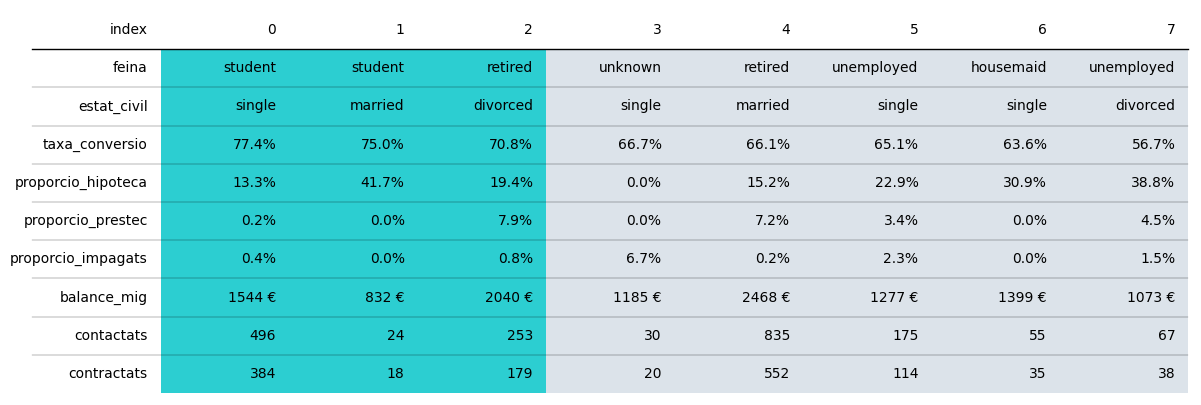

In [10]:


# Agrupem el dataframe per la combinaci√≥ de les caracter√≠stiques demogr√†fiques 
df_agrupat_pc = df.groupby(['job', 'marital'])

# Creem una taula per al c√†lcul de conversions
taula_conversio_pc = []

# Recorrem la taula calculant la conversi√≥ i altres m√®triques de cada grup
for (feina, estat_civil), grup in df_agrupat_pc:
    contactats = grup.nunique().id
    contractats = grup[grup['deposit'] == True].nunique().id
    conversio = contractats / contactats if contactats != 0 else 0
    proporcio_hipoteca = grup['housing'].mean()
    proporcio_prestec = grup['loan'].mean()
    proporcio_impagats = grup['default'].mean()
    balance_mig = grup['balance'].mean()

    # Afegim cada resultat a la taula
    taula_conversio_pc.append({
        'feina': feina,
        'estat_civil': estat_civil,
        'contactats': contactats,
        'contractats': contractats,
        'taxa_conversio': conversio,
        'proporcio_hipoteca': proporcio_hipoteca,
        'proporcio_prestec': proporcio_prestec,
        'proporcio_impagats': proporcio_impagats,
        'balance_mig': balance_mig
    })

# Convertim la taula de conversi√≥ en un dataframe 
resultats_ordenats2 = pd.DataFrame(taula_conversio_pc)

# Ordenem per la taxa de conversi√≥
resultats_ordenats2 = resultats_ordenats2.sort_values(by='taxa_conversio', ascending=False).reset_index(drop=True)

# Convertir proporcions a percentatges i balance a euros arrodonit
resultats_ordenats2['taxa_conversio'] = (resultats_ordenats2['taxa_conversio'] * 100).round(1).astype(str) + '%'
resultats_ordenats2['proporcio_hipoteca'] = (resultats_ordenats2['proporcio_hipoteca'] * 100).round(1).astype(str) + '%'
resultats_ordenats2['proporcio_prestec'] = (resultats_ordenats2['proporcio_prestec'] * 100).round(1).astype(str) + '%'
resultats_ordenats2['proporcio_impagats'] = (resultats_ordenats2['proporcio_impagats'] * 100).round(1).astype(str) + '%'
resultats_ordenats2['balance_mig'] = resultats_ordenats2['balance_mig'].round(0).astype(int).astype(str) + ' ‚Ç¨'

# Seleccionar el top 8
top8_resultats_ordenats2 = resultats_ordenats2.head(8).copy()

# Seleccionar columnes per mostrar
top8_resultats_ordenats2 = top8_resultats_ordenats2[[
    'feina', 'estat_civil',
    'taxa_conversio',
    'proporcio_hipoteca', 'proporcio_prestec',
    'proporcio_impagats', 'balance_mig','contactats', 'contractats'
]]

# Transposar per visualitzaci√≥
top8_transposada2 = top8_resultats_ordenats2.transpose()



# Mostrar taula
fig, ax = plt.subplots(figsize=(15, 5))
tab = Table(
    top8_transposada2,
)


#¬†Modifiquem manualment els colors de les columnes
tab.columns[0].set_facecolor('#2CCED1')
tab.columns[1].set_facecolor('#2CCED1')
tab.columns[2].set_facecolor('#2CCED1')
tab.columns[3].set_facecolor('#DCE3EA')
tab.columns[4].set_facecolor('#DCE3EA')
tab.columns[5].set_facecolor('#DCE3EA')
tab.columns[6].set_facecolor('#DCE3EA')
tab.columns[7].set_facecolor('#DCE3EA')


plt.show()

# Testos: Les proporcions s√≥n diferents entre grups?


### Test de chi-quadrat
Si el p-valor < 0.05, les difer√®ncies s√≥n significatives.


#### Hipoteca

Com que el valor √©s 2.57, les difer√®ncies s√≥n significatives.

In [11]:
from scipy.stats import chi2_contingency

# Exemple amb 'housing'
taula_housing = pd.crosstab(
    df['housing'],
    [df['job'], df['marital'], df['education']]
)

chi2, p, _, _ = chi2_contingency(taula_housing)

print("p-valor (housing):", p)
if p < 0.05:
    print("Hi ha una associaci√≥ significativa entre 'housing' i les altres variables.")
else:
    print("No hi ha una associaci√≥ significativa entre 'housing' i les altres variables.")


p-valor (housing): 2.574325798771052e-308
Hi ha una associaci√≥ significativa entre 'housing' i les altres variables.


#### Pr√©stec


In [12]:
# Exemple amb 'housing'
taula_loan = pd.crosstab(
    df['loan'],
    [df['job'], df['marital'], df['education']]
)

chi2, p, _, _ = chi2_contingency(taula_loan)

print("p-valor (loan):", p)
if p < 0.05:
    print("Hi ha una associaci√≥ significativa entre 'loan' i les altres variables.")
else:
    print("No hi ha una associaci√≥ significativa entre 'loan' i les altres variables.")

p-valor (loan): 1.3582306001631257e-52
Hi ha una associaci√≥ significativa entre 'loan' i les altres variables.


#### Impagament

In [13]:


# Exemple amb 'housing'
taula_default = pd.crosstab(
    df['default'],
    [df['job'], df['marital'], df['education']]
)

chi2, p, _, _ = chi2_contingency(taula_default)

print("p-valor (default):", p)
if p < 0.05:
    print("Hi ha una associaci√≥ significativa entre 'default' i les altres variables.")
else:
    print("No hi ha una associaci√≥ significativa entre 'defailt' i les altres variables.")

p-valor (default): 2.974683297940794e-40
Hi ha una associaci√≥ significativa entre 'default' i les altres variables.


### ANOVA (test F)

 per comparar la mitjana del balan√ß entre perfils

 A large F value indicates that the differences in group means are substantially greater than the variability within each group

In [14]:
from scipy.stats import f_oneway

# Crear una llista amb els grups (1 per combinaci√≥ √∫nica)
grups_balance = [
    grup['balance']
    for _, grup in df.groupby(['job', 'marital', 'education'])
    if len(grup) > 1  # evitar grups buits o amb un sol valor
]

anova_balance = f_oneway(*grups_balance)
print("p-valor (balance):", anova_balance.pvalue)

p-valor (balance): 2.1587882704923982e-34


### Nom√©s els 8 perfils (3 variables) amb m√©s conversi√≥

Les difer√®ncies de comportament financer entre perfils s√≥n estad√≠sticament significatives si (p < 0.05)

In [15]:
# Pas 1: Seleccionem els perfils del top 8
top8_profils3 = top8_resultats_ordenats3[['feina', 'estat_civil', 'educaci√≥']]

# Pas 2: Filtrar el DataFrame amb nom√©s aquests perfils
df_top83 = df.merge(
    top8_profils3,
    left_on=['job', 'marital', 'education'],
    right_on=['feina', 'estat_civil', 'educaci√≥'],
    how='inner'
)

# Pas 3: Chi-quadrat per housing, loan, default
for col in ['housing', 'loan', 'default']:
    taula = pd.crosstab(
        df_top83[col],
        [df_top83['job'], df_top83['marital'], df_top83['education']]
    )

    chi2, p, _, _ = chi2_contingency(taula)
    print(f"üîπ p-valor ({col}): {p:.4f} => {'Significatiu' if p < 0.05 else 'No significatiu'}")

# Pas 4: ANOVA per balance
grups_balance = [
    grup['balance']
    for _, grup in df_top83.groupby(['job', 'marital', 'education'])
    if len(grup) > 1
]

anova_resultat = f_oneway(*grups_balance)
print(f"üîπ p-valor (balance): {anova_resultat.pvalue:.4f} => {'Significatiu' if anova_resultat.pvalue < 0.05 else 'No significatiu'}")

üîπ p-valor (housing): 0.0264 => Significatiu
üîπ p-valor (loan): 1.0000 => No significatiu
üîπ p-valor (default): 0.0000 => Significatiu
üîπ p-valor (balance): 0.9275 => No significatiu


### Nom√©s els 8 perfils (2 variables) amb m√©s conversi√≥

In [16]:
# Pas 1: Seleccionem els perfils del top 8
top8_profils2 = top8_resultats_ordenats2[['feina', 'estat_civil']]

# Pas 2: Filtrar el DataFrame amb nom√©s aquests perfils
df_top82 = df.merge(
    top8_profils2,
    left_on=['job', 'marital'],
    right_on=['feina', 'estat_civil'],
    how='inner'
)

# Pas 3: Chi-quadrat per housing, loan, default
for col in ['housing', 'loan', 'default']:
    taula = pd.crosstab(
        df_top82[col],
        [df_top82['job'], df_top82['marital'], df_top82['education']]
    )

    chi2, p, _, _ = chi2_contingency(taula)
    print(f"üîπ p-valor ({col}): {p:.4f} => {'Significatiu' if p < 0.05 else 'No significatiu'}")

# Pas 4: ANOVA per balance
grups_balance = [
    grup['balance']
    for _, grup in df_top83.groupby(['job', 'marital', 'education'])
    if len(grup) > 1
]

anova_resultat = f_oneway(*grups_balance)
print(f"üîπ p-valor (balance): {anova_resultat.pvalue:.4f} => {'Significatiu' if anova_resultat.pvalue < 0.05 else 'No significatiu'}")

üîπ p-valor (housing): 0.0000 => Significatiu
üîπ p-valor (loan): 0.0000 => Significatiu
üîπ p-valor (default): 0.0000 => Significatiu
üîπ p-valor (balance): 0.9275 => No significatiu


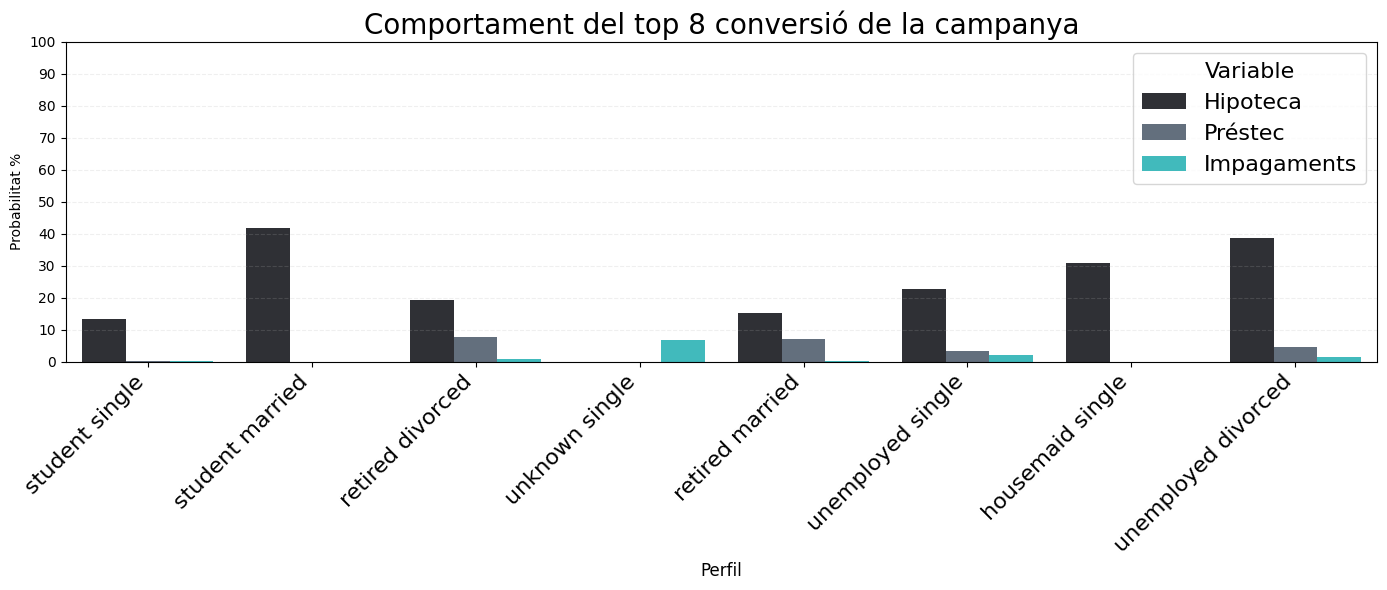

In [17]:

custom_palette_comportament = ["#2E2F36",  "#5F6F81", "#2CCED1" ]  


# Copiem i convertim les proporcions a num√®rics
df_plot = top8_resultats_ordenats2.copy()

# Eliminar s√≠mbols % i convertir a float
for col in ['proporcio_hipoteca', 'proporcio_prestec', 'proporcio_impagats']:
    df_plot[col] = df_plot[col].str.replace('%', '').astype(float)

# Crear una nova columna "perfil" per a etiquetar
df_plot['perfil'] = df_plot['feina'] + ' ' + df_plot['estat_civil']

# Reorganitzar dades per fer barres agrupades
df_melted = df_plot.melt(
    id_vars='perfil',
    value_vars=['proporcio_hipoteca', 'proporcio_prestec', 'proporcio_impagats'],
    var_name='variable',
    value_name='percentatge'
)

# Traducci√≥ opcional de noms de variable
traduccions = {
    'proporcio_hipoteca': 'Hipoteca',
    'proporcio_prestec': 'Pr√©stec',
    'proporcio_impagats': 'Impagaments'
}
df_melted['variable'] = df_melted['variable'].map(traduccions)

# Gr√†fic
plt.figure(figsize=(14, 6))
import seaborn as sns
sns.barplot(
    data=df_melted,
    x='perfil', y='percentatge', hue='variable',
    palette = custom_palette_comportament  

)

# L√≠nies horitzontals cada 10%
plt.yticks(range(0, 101, 10))  # de 0 a 100, pas de 10
plt.grid(axis='y', linestyle='--', alpha=0.2)

plt.title('Comportament del top 8 conversi√≥ de la campanya', fontsize=20)
plt.ylabel('Probabilitat %')
plt.xlabel('Perfil', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.legend(title='Variable', prop={'size': 16}, title_fontsize=16)
plt.tight_layout()
plt.show()
